<a href="https://colab.research.google.com/github/rekharchandran/Ubiqum-Workshops/blob/master/NLP_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural language processing

**Wikipedia definition**

Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

Challenges in natural language processing frequently involve **speech recognition**, **natural language understanding**, and **natural language generation**.

**Human NLP**

https://www.youtube.com/watch?v=US89JaCd7U8

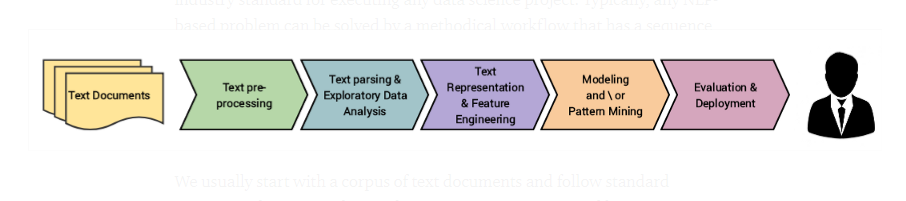

## NLP Topics

1.	Data Retrieval / Web Scraping
2.	Text wrangling / pre-processing
3.	Tagging Parts of Speech 
4.	Shallow Parsing
5.	Constituency and Dependency Parsing
6.	Named Entity Recognition
7.	Emotion and Sentiment Analysis

### Web scraping

In [0]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline





Build a function **'build_dataset'** which will leverage 
requests to access and get the HTML content from the landing pages of each of the three news categories.

In [0]:
seed_urls = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

def build_dataset(seed_urls):
    news_data = []
    for url in seed_urls:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        
        news_articles = [{'news_headline': headline.find('span', 
                                                         attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', 
                                                       attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', 
                                               class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', 
                                               class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles)
        
    df =  pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df

**Getting the Data**:


 Extract the news headline, article text and category and build out a data frame, where each row corresponds to a specific news article. We will now invoke this function and build our dataset.

In [0]:
news_df = build_dataset(seed_urls)
news_df.head(10)

,news_headline,news_article,news_category
0,OnePlus reveals first-look of OnePlus 7T with ...,"Ahead of the launch, OnePlus released the firs...",technology
1,OnePlus 7T series to launch on September 26 in...,OnePlus has announced that it will host the la...,technology
2,Katy Perry & Dua Lipa to perform at OnePlus Mu...,International pop-stars Katy perry and Dua Lip...,technology
3,Uber working on Ola-like OTP verification befo...,Uber is reportedly testing a new feature that ...,technology
4,Instagram Music starts rolling out for users i...,Instagram has started rolling out its Instagra...,technology
5,Apple to invest $250 million in iPhone glass s...,Apple has announced that it is investing $250 ...,technology
6,Apple to invest $1 bn to expand iPhone product...,Apple is reportedly investing $1 billion throu...,technology
7,I doubt US will do a wealth tax; wouldn't oppo...,"World's second-richest person, Microsoft Co-fo...",technology
8,Musk hired detective to probe man who sued ove...,Tesla CEO Elon Musk has revealed that he hired...,technology
9,Amazon changed product search to favour more p...,Amazon tweaked its product-search algorithm to...,technology


This formatted dataset of news articles and one can quickly check the total number of news articles with the following code.

In [0]:
news_df.news_category.value_counts()

sports        25
world         25
technology    25
Name: news_category, dtype: int64

### Text Wrangling and Preprocessing

Highlight some of the most important steps which are used heavily in Natural Language Processing (NLP) pipelines. We will be leveraging a fair bit of nltk and spacy, both state-of-the-art libraries in NLP. 

Installing the libraries

There are 2 major libraries:
**NLTK** and **SPACY**



**NLTK**

NLTK provides a plethora of algorithms to choose from for a particular problem which is boon for a researcher but a bane for a developer. 

**SPACY**

Whereas, spaCy keeps the best algorithm for a problem in its toolkit and keep it updated as state of the art improves.

**NLTK**

NLTK supports various languages whereas spaCy have statistical models for 7 languages (English, German, Spanish, French, Portuguese, Italian, and Dutch). It also supports named entities for multi language.
NLTK is a string processing library. It takes strings as input and returns strings or lists of strings as output

**SPACY**

Whereas, spaCy uses object-oriented approach. When we parse a text, spaCy returns document object whose words and sentences are objects themselves.


spaCy has support for word vectors whereas NLTK does not.
As spaCy uses the latest and best algorithms, its performance is usually good as compared to NLTK. 



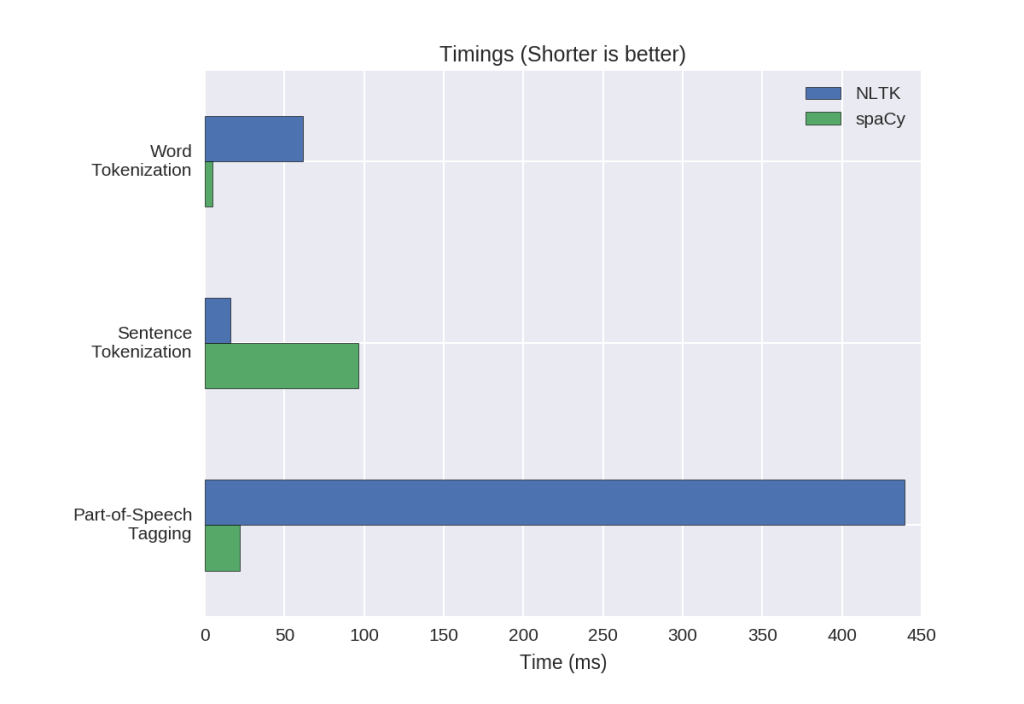

In [0]:
!pip install -U spacy

In [0]:
#import spacy
#spacy.load('en_core')
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 826.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255076 sha256=2738c387011d08429aa20b4d762c24e08effd6b852cbf5edccbd1a055aed992f
  Stored in directory: /tmp/pip-ephem-wheel-cache-6kqzphy5/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


 Load up the necessary dependencies for text pre-processing. Remove negation words from stop words, since keeping negation words  might be useful, especially during sentiment analysis.

In [0]:
import spacy
spacy.load('en_core_web_lg')

In [0]:
#!pip install contractions

**Contraction MAP**



Contractions are shortened version of words or syllables. They often exist in either written or spoken forms in the English language. These shortened versions or contractions of words are created by removing specific letters and sounds. In case of English contractions, they are often created by removing one of the vowels from the word. Examples would be, do not to don’t and I would to I’d. Converting each contraction to its expanded, original form helps with text standardization.

CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}


**Usgae of contraction MAP**

In [0]:
import re
def expand_contractions(text):
    CONTRACTION_MAP = { "ain't": "is not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he he will have", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so as", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }
    
    contractions_pattern = re.compile('({})'.format('|'.join(CONTRACTION_MAP.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = CONTRACTION_MAP.get(match)\
                                if CONTRACTION_MAP.get(match)\
                                else CONTRACTION_MAP.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

In [0]:
import nltk
nltk.download("popular")

In [0]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata


nlp = spacy.load('en_core_web_lg', parse=True, tag=True, entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

**Removing HTML tags**

In [0]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text blah blah</h2></html>')

'Some important text blah blah'

**Removing special character**


Special characters and symbols are usually non-alphanumeric characters or even occasionally numeric characters (depending on the problem), which add to the extra noise in unstructured text. Usually, simple regular expressions (regexes) can be used to remove them.

In [0]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

**Stemming**

To understand stemming, you need to gain some perspective on what word stems represent. Word stems are also known as the base form of a word, and we can create new words by attaching affixes to them in a process known as inflection. Consider the word COOK. You can add affixes to it and form new words like COOKS, COOKED, and COOKING. In this case, the base word COOK is the word stem.

**NOTE**


Do note that usually stemming has a fixed set of rules, hence, the root stems may not be lexicographically correct. Which means, the stemmed words may not be semantically correct, and might have a chance of not being present in the dictionary (as evident from the preceding output)

In [0]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

**Lemmatization**

Lemmatization is very similar to stemming, where we remove word affixes to get to the base form of a word. 

However, the base form in this case is known as the root word, but not the root stem. 

The difference being that the root word is always a lexicographically correct word (present in the dictionary), but the root stem may not be so. Thus, root word, also known as the lemma, will always be present in the dictionary. Both nltk and spacy have excellent lemmatizers. We will be using spacy here.

In [0]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crash yesterday , ours crash daily'

**Removing Stopwords**


Words which have little or no significance, especially when constructing meaningful features from text, are known as stopwords or stop words. These are usually words that end up having the maximum frequency if you do a simple term or word frequency in a corpus. Typically, these can be articles, conjunctions, prepositions and so on. Some examples of stopwords are a, an, the, and the like.


In [0]:

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, Bootcamp is not")


', , stopwords , Bootcamp not'

**Text Normalizer**

While we can definitely keep going with more techniques like correcting spelling, grammar and so on, let’s now bring everything we learnt together and chain these operations to build a text normalizer to pre-process text data.


In [0]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

**Removing accented characters**


Usually in any text corpus, you might be dealing with accented characters/letters, especially if you only want to analyze the English language. Hence, we need to make sure that these characters are converted and standardized into ASCII characters. A simple example — converting é to e.

In [0]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

We will first combine the news headline and the news article text together to form a document for each piece of news. Then, we will pre-process them.

In [0]:

# combining headline and article text
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

# pre-process text and store the same
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])

# show a sample news article
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'clean_text': 'oneplus series launch september india oneplus announce host launch event oneplus series september indira gandhi arena new delhi pm company also confirm upcoming smartphone series feature hz refresh display global launch event series take place london october',
 'full_text': 'OnePlus 7T series to launch on September 26 in India. OnePlus has announced that it will host the launch event of the OnePlus 7T series on September 26 at the Indira Gandhi Arena in New Delhi at 7 pm. The company also confirmed that the upcoming smartphone series will feature a 90Hz refresh display. The global launch event for the series will take place in London on October 10.'}

In [0]:
news_df.to_csv('news.csv', index=False, encoding='utf-8')


### Tagging Parts of Speech

### Shallow Parsing

### Constituency and Dependency Parsing

### Named Entity Recognition

### Emotion and Sentiment Analysis

Sentiment analysis is perhaps one of the most popular applications of NLP, with a vast number of tutorials, courses, and applications that focus on analyzing sentiments of diverse datasets ranging from corporate surveys to movie reviews. The key aspect of sentiment analysis is to analyze a body of text for understanding the opinion expressed by it. Typically, we quantify this sentiment with a positive or negative value, called polarity. The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score.


Usually, sentiment analysis works best on text that has a subjective context than on text with only an objective context. Objective text usually depicts some normal statements or facts without expressing any emotion, feelings, or mood. Subjective text contains text that is usually expressed by a human having typical moods, emotions, and feelings. Sentiment analysis is widely used, especially as a part of social media analysis for any domain, be it a business, a recent movie, or a product launch, to understand its reception by the people and what they think of it based on their opinions or, you guessed it, sentiment!

Typically, sentiment analysis for text data can be computed on several levels, including on an individual sentence level, paragraph level, or the entire document as a whole. Often, sentiment is computed on the document as a whole or some aggregations are done after computing the sentiment for individual sentences. There are two major approaches to sentiment analysis.
+ Supervised machine learning or deep learning approaches
+ Unsupervised lexicon-based approaches

**Lexicon**


A lexicon is a dictionary, vocabulary, or a book of words. In our case, lexicons are special dictionaries or vocabularies that have been created for analyzing sentiments. Most of these lexicons have a list of positive and negative polar words with some score associated with them, and using various techniques like the position of words, surrounding words, context, parts of speech, phrases, and so on, scores are assigned to the text documents for which we want to compute the sentiment. After aggregating these scores, we get the final sentiment.

Various popular lexicons are used for sentiment analysis, including the following.
* AFINN lexicon
* Bing Liu’s lexicon
* MPQA subjectivity lexicon
* SentiWordNet
* VADER lexicon
* TextBlob lexicon

In [0]:
!pip install afinn

     |████████████████████████████████| 61kB 4.1MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp36-none-any.whl size=53453 sha256=a1c8f7e38d6f5dce5f7edc489a31c1b9045631a4e163c764eac81d4db009ab87
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


In [0]:
# create a basic pre-processed corpus, don't lowercase to get POS context
corpus = normalize_corpus(news_df['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

# demo for POS tagging for sample news headline
sentence = str(news_df.iloc[1].news_headline)
sentence_nlp = nlp(sentence)

# POS tagging with Spacy 
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

# POS tagging with nltk
nltk_pos_tagged = nltk.pos_tag(sentence.split())
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,OnePlus,JJ
1,reveals,NNS
2,first-look,NN
3,of,IN
4,OnePlus,NNP
5,7T,CD
6,with,IN
7,triple,JJ
8,camera,NN
9,design,NN


In [0]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    
    
# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                           
                        count  mean       std   min  25%  50%  75%   max
news_category                                                           
sports                   25.0  2.72  6.528910 -12.0 -2.0  4.0  7.0  16.0
technology               25.0  0.80  4.490731  -8.0 -2.0  0.0  3.0  11.0
world                    25.0 -3.88  5.158488 -13.0 -8.0 -3.0  0.0   6.0

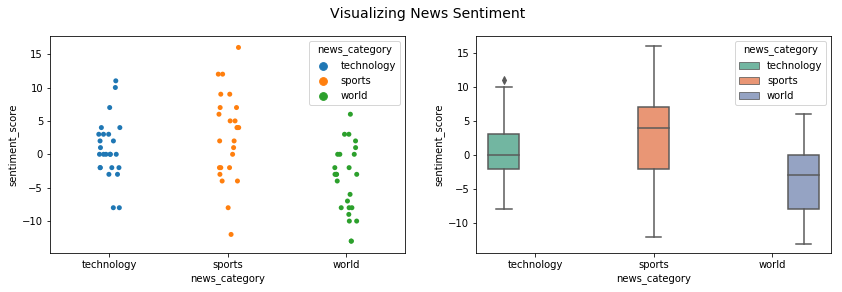

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score", 
                   hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", 
                 hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


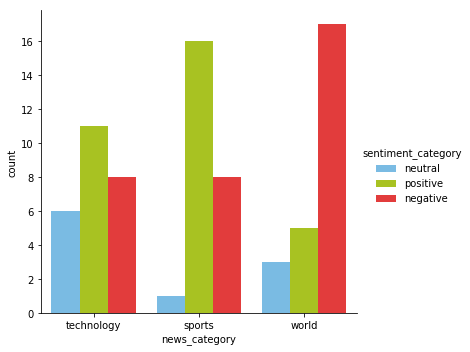

In [0]:

fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

### Interview Prep

#### String

https://leetcode.com/problemset/algorithms/?search=string